In [ ]:
import QPIXL.helper as hlp
from QPIXL.qiskit.qpixl_parallel import cFRQI
from qiskit_aer import StatevectorSimulator
import qiskit 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


# Bug in parallel qpixl decoding    
There is a problem somewhere in this pipeline, and it could be in the decoding, or the scaling which makes the colors look quite different than they ought to be. This is a problem in the ```hlp.decodeParallelQPIXL``` function, or in how the variable ```np_frame``` is loaded into the ```cFRQI``` function. We expect that ```cFRQI``` is functioning as expected. 

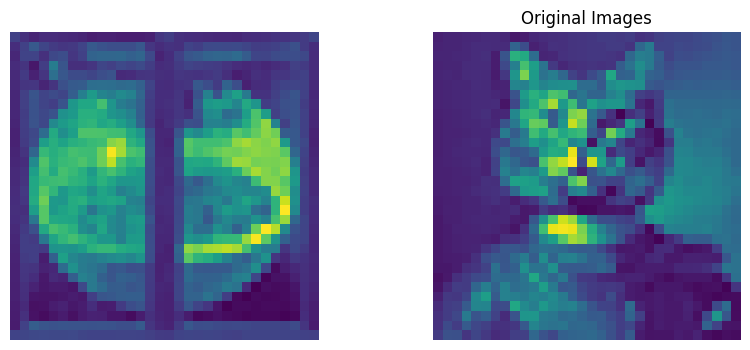

In [1]:
backend = StatevectorSimulator(method="statevector")

# Load the image and convert to grayscale
img = Image.open('figures/creation_world.png')
img = img.convert('L')
img = np.array(img.resize((32,32), Image.Resampling.LANCZOS)) # Compress for faster processing
img2 = Image.open('figures/cat.webp')
img2 = img2.convert('L')
img2 = np.array(img2.resize((32,32), Image.Resampling.LANCZOS))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.axis('off')
ax2.axis('off')
ax1.imshow(img)
ax2.imshow(img2)
plt.suptitle('Original Images')
plt.show()

/Users/danielbultrini/CODE/QuantumArtHack/QPIXL/helper.py:111: RuntimeWarning: overflow encountered in scalar multiply
  scal = np.pi / (a.max() * 2)


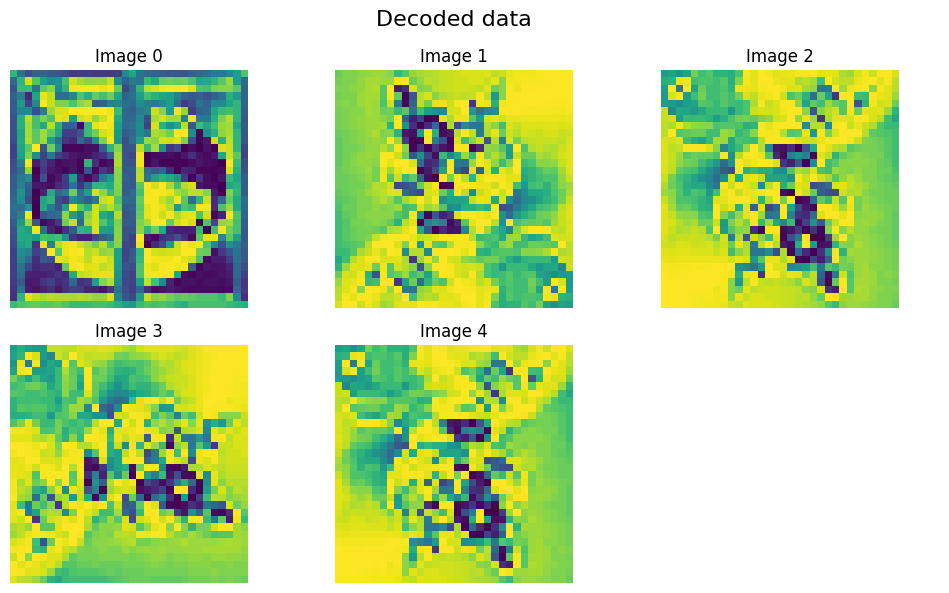

In [3]:
shape = img.shape
# Just rotate the images to get additional data
np_frame = [np.array(img).T.flatten(),np.array(img2).T.flatten(),np.flip(np.array(img2).T.flatten()),np.flip(np.array(img2)).flatten(),np.flip(np.array(img2)).T.flatten()] #sometimes you have to transpose the image for the decoding to make sense
decoded_data = []
labels = []
comp_str = "Compression: "+str(0)+"% \n"
qc = cFRQI(np_frame,0)
job = backend.run(qc)
depth_str = " Circuit depth: "+str(qc.depth())
#### Just for show
sv = np.real(job.result().get_statevector())
decoded = hlp.decodeParallelQPIXL(sv,qc,len(np_frame))
for datum in decoded:
    decoded_data.append(hlp.reconstruct_img(datum, shape))
labels.append(comp_str+depth_str)

# Plotting stuff
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
for i, ax in enumerate(axs.flat):
    if i < 3:
        ax.imshow(decoded_data[i])
        ax.set_title(f"Image {i}")
        ax.axis("off")  # Hide axes
axs[1, 2].axis("off")
bottom_grid = axs[1, :2]
for i, ax in enumerate(bottom_grid):
    ax.imshow(decoded_data[i + 3])
    ax.set_title(f"Image {i + 3}")
    ax.axis("off")  # Hide axes
plt.suptitle("Decoded data", fontsize=16)
plt.tight_layout()
plt.show()

# Bug with different sized inputs
parallel qpixl does not handle differently sized inputs well, it would be good to fix this so that images can be used arbitrarily here, there is a ```pad0``` function in ```QPIXL.helper```, but it is not implemented in the pipeline. 

In [4]:
img = Image.open('figures/creation_world.png')
img = img.convert('L')
img = np.array(img.resize((33,40), Image.Resampling.LANCZOS)) # Compress for faster processing
img2 = Image.open('figures/cat.webp')
img2 = img2.convert('L')
img2 = np.array(img2.resize((41,34), Image.Resampling.LANCZOS))
shapes = [img.shape, img2.shape, img2.shape, img2.shape, img2.shape]
# Just rotate the images to get additional data
np_frame = [np.array(img).T.flatten(),np.array(img2).T.flatten(),np.flip(np.array(img2).T.flatten()),np.flip(np.array(img2)).flatten(),np.flip(np.array(img2)).T.flatten()] #sometimes you have to transpose the image for the decoding to make sense
decoded_data = []
labels = []
comp_str = "Compression: "+str(0)+"% \n"
qc = cFRQI(np_frame,0)
job = backend.run(qc)
depth_str = " Circuit depth: "+str(qc.depth())
#### Just for show
sv = np.real(job.result().get_statevector())
decoded = hlp.decodeParallelQPIXL(sv,qc,len(np_frame))
for datum, shape in zip(decoded,shape):
    decoded_data.append(hlp.reconstruct_img(datum, shape))
labels.append(comp_str+depth_str)

# Plotting stuff
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
for i, ax in enumerate(axs.flat):
    if i < 3:
        ax.imshow(decoded_data[i])
        ax.set_title(f"Image {i}")
        ax.axis("off")  # Hide axes
axs[1, 2].axis("off")
bottom_grid = axs[1, :2]
for i, ax in enumerate(bottom_grid):
    ax.imshow(decoded_data[i + 3])
    ax.set_title(f"Image {i + 3}")
    ax.axis("off")  # Hide axes
plt.suptitle("Decoded data", fontsize=16)
plt.tight_layout()
plt.show()

/Users/danielbultrini/CODE/QuantumArtHack/QPIXL/helper.py:111: RuntimeWarning: overflow encountered in scalar multiply
  scal = np.pi / (a.max() * 2)


IndexError: index 1320 is out of bounds for axis 0 with size 1320